In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Importing DataSet

In [2]:
dataset = pd.read_csv('monthlyexp vs incom.csv')
dataset

,MonthsExperience,Income
0,3,424
1,3,387
2,3,555
3,4,590
4,4,533
5,5,633
6,6,560
7,6,621
8,7,581
9,8,593


In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values

In [4]:
x

array([[ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [10],
       [11],
       [11],
       [12],
       [12],
       [12],
       [13],
       [13],
       [14],
       [14],
       [15],
       [15],
       [16],
       [16],
       [17],
       [18],
       [18]], dtype=int64)

In [5]:
y

array([ 424,  387,  555,  590,  533,  633,  560,  621,  581,  593,  594,
        635,  703,  684,  854,  837,  963,  941, 1006, 1037, 1162, 1118,
       1079, 1193, 1240, 1337, 1332, 1426, 1690, 1382], dtype=int64)

# Split data into training and test set

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [7]:
display(y_test)

array([ 555, 1690,  684,  594, 1332, 1240, 1426,  635,  941], dtype=int64)

# Polynomial regression

In [8]:
# Add the polynomial term to the equation/model
from sklearn.preprocessing import PolynomialFeatures 
  
polynom = PolynomialFeatures(degree =7) 
x_polynom = polynom.fit_transform(x_train) 
#polynom.fit(x_polynom,y)
x_polynom

array([[1.00000000e+00, 1.40000000e+01, 1.96000000e+02, 2.74400000e+03,
        3.84160000e+04, 5.37824000e+05, 7.52953600e+06, 1.05413504e+08],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04, 7.81250000e+04],
       [1.00000000e+00, 1.20000000e+01, 1.44000000e+02, 1.72800000e+03,
        2.07360000e+04, 2.48832000e+05, 2.98598400e+06, 3.58318080e+07],
       [1.00000000e+00, 7.00000000e+00, 4.90000000e+01, 3.43000000e+02,
        2.40100000e+03, 1.68070000e+04, 1.17649000e+05, 8.23543000e+05],
       [1.00000000e+00, 1.10000000e+01, 1.21000000e+02, 1.33100000e+03,
        1.46410000e+04, 1.61051000e+05, 1.77156100e+06, 1.94871710e+07],
       [1.00000000e+00, 1.50000000e+01, 2.25000000e+02, 3.37500000e+03,
        5.06250000e+04, 7.59375000e+05, 1.13906250e+07, 1.70859375e+08],
       [1.00000000e+00, 1.30000000e+01, 1.69000000e+02, 2.19700000e+03,
        2.85610000e+04, 3.71293000e+05, 4.82680900e+06, 6.

In [10]:
#Fit the Polynomial Regression Model 
from sklearn.linear_model import LinearRegression
PolyReg = LinearRegression() 
PolyReg.fit(x_polynom, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Visualise Training Results 

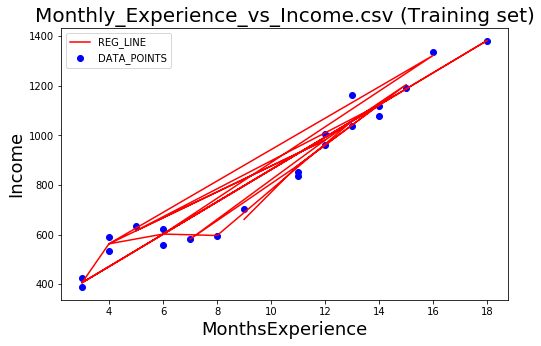

In [20]:
# Visualise the Polynomial Regression Results 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train ,color = 'b',label="DATA_POINTS") 
  
plt.plot(x_train, PolyReg.predict(polynom.fit_transform(x_train)), color = 'r',label="REG_LINE") 
plt.title('Monthly_Experience_vs_Income.csv (Training set)',fontsize=20)
plt.xlabel('MonthsExperience',fontsize=18)
plt.ylabel('Income',fontsize=18)
plt.legend()
  
plt.show() 

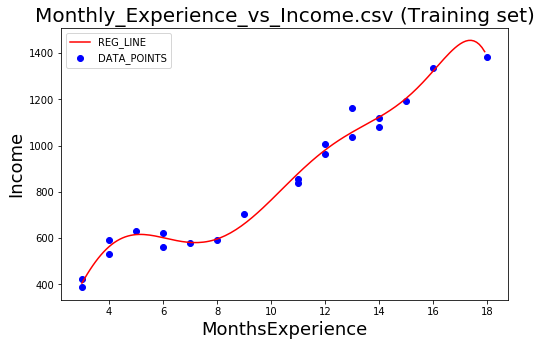

In [21]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
plt.figure(figsize=(8,5))
X_grid = np.arange(min(x_train), max(x_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_train, y_train, color = 'b',label="DATA_POINTS")
plt.plot(X_grid, PolyReg.predict(polynom.fit_transform(X_grid)), color = 'r',label="REG_LINE")
plt.title('Monthly_Experience_vs_Income.csv (Training set)',fontsize=20)
plt.xlabel('MonthsExperience',fontsize=18)
plt.ylabel('Income',fontsize=18)
plt.legend()
  
  
plt.show()

# Visualizing the Test Result

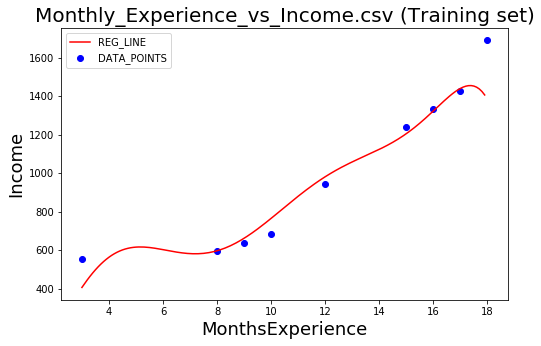

In [14]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
plt.figure(figsize=(8,5))
X_grid = np.arange(min(x_test), max(x_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_test, y_test, color = 'b',label="DATA_POINTS")
plt.plot(X_grid, PolyReg.predict(polynom.fit_transform(X_grid)), color = 'r',label="REG_LINE")
plt.title('Monthly_Experience_vs_Income.csv (Training set)',fontsize=20)
plt.xlabel('MonthsExperience',fontsize=18)
plt.ylabel('Income',fontsize=18)
plt.legend()
  
plt.show()

### Prediction

In [15]:
#make prediction
y_pred = PolyReg.predict(polynom.fit_transform(x_test))

### Mean Squared Error

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mse

14083.25844440771

### Accuracy

In [19]:
poly_reg_acc=r2_score(y_test,y_pred)
print(r2_score(y_test,y_pred))

0.9109767354422075
